# TensorFlow Sequential API

In [1]:
# Import packages
import tensorflow as tf

from tensorflow.keras import layers

tf.__version__ # 2.x

'2.3.0'

In [2]:
# Sequential model
model = tf.keras.Sequential(
    [
        layers.Dense(2, activation="relu", name="layer1"),
        layers.Dense(3, activation="relu", name="layer2"),
        layers.Dense(4, name="layer3"),
    ]
)

# Call model on a test input
x = tf.ones((3, 3))
print(model(x))

tf.Tensor(
[[-0.15737355  0.04715701  0.04178648  0.06360441]
 [-0.15737355  0.04715701  0.04178648  0.06360441]
 [-0.15737355  0.04715701  0.04178648  0.06360441]], shape=(3, 4), dtype=float32)


A Sequential model is not an appropriate strategy when:

- Your model has multiple inputs or multiple outputs.
- Any of your layers has multiple inputs or multiple outputs.
- You need to do layer sharing.
- You want non-linear topology (e.g. a residual connection, a multi-branch model, etc.)

In [3]:
# Layers can be accessed as attribute of a model class
model.layers

It can be very useful when building a Sequential model incrementally to be able to display the summary of the model so far, including the current output shape.

In this case, you should start your model by passing an Input object to your model, so that it knows its input shape from the start.

In [4]:
# Define model
model = tf.keras.Sequential()

# Add input object
model.add(tf.keras.Input(shape=(4,)))

# Add first layer
model.add(layers.Dense(2, activation="relu"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 10        
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


In [5]:
# Add another layer
model.add(layers.Dense(2, activation="relu"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 10        
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 6         
Total params: 16
Trainable params: 16
Non-trainable params: 0
_________________________________________________________________


A simple alternative is to just pass an input_shape argument to your first layer:

In [6]:
# Define model
model = tf.keras.Sequential()

# Add first layer with input object
model.add(layers.Dense(2, activation="relu", input_shape=(4,)))

# Add second layer
model.add(layers.Dense(2, activation="relu"))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 2)                 10        
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 6         
Total params: 16
Trainable params: 16
Non-trainable params: 0
_________________________________________________________________


In [7]:
# Model layers
model.layers

Models built with a predefined input shape like this always have weights (even before seeing any data) and always have a defined output shape.

You can also plot the model for better visualization.

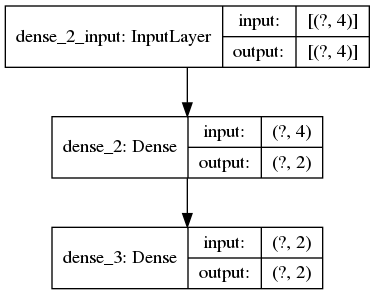

In [8]:
tf.keras.utils.plot_model(model, "/tmp/sequential-model-api.png", show_shapes=True)